## IDEA:
## Older riders take longer duration bike rides than the rest of the population
## NULL HYPOTHESIS:
## The average duration of bike rides of older riders (defined as the 75th percentile in age and above rider) is equal to or less than the duration of bike rides of all other riders

## _$H_0$_ : $ duration_\mathrm{old} <= duration_\mathrm{young} $
## _$H_1$_ : $ duration_\mathrm{old} > duration_\mathrm{young} $

## I will use a significance level alpha=0.05
## which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import datetime
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json



Populating the interactive namespace from numpy and matplotlib


In [2]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system


def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
                # bm: add unzip
                os.system("unzip " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
            
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")
    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df=pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [5]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [35]:
df_small = df[['tripduration', 'birth year', 'starttime']]

In [36]:
df_small.head()

,tripduration,birth year,starttime
0,1346,1960.0,1/1/2015 0:01
1,363,1963.0,1/1/2015 0:02
2,346,1974.0,1/1/2015 0:04
3,182,1969.0,1/1/2015 0:04
4,969,1977.0,1/1/2015 0:05


In [37]:
#drop missing values
df_small = df_small.dropna()

#determine age of bikers (it's only 2015 data here)
df_small['age'] = 2015-df_small['birth year']

In [38]:
df_small.describe()

,tripduration,birth year,age
count,279924.000000,279924.000000,279924.000000
mean,635.529058,1974.951419,40.048581
std,848.484027,11.574637,11.574637
min,60.000000,1899.000000,16.000000
25%,332.000000,1967.000000,31.000000
50%,498.000000,1977.000000,38.000000
75%,757.000000,1984.000000,48.000000
max,43023.000000,1999.000000,116.000000


In [39]:
# define older riders as those riders who are 48 years or older
# (taken from table above)
df_small['old'] = df_small['age']>=48

In [41]:
#remove outlier ages
sd_threshold = 4
df_small = df_small[abs(df_small.age - df_small.age.mean()) < (sd_threshold * df_small.age.std())]
df_small.describe()

,tripduration,birth year,age
count,279782.000000,279782.000000,279782.000000
mean,635.329446,1974.987390,40.012610
std,848.560016,11.465407,11.465407
min,60.000000,1930.000000,16.000000
25%,332.000000,1967.000000,31.000000
50%,498.000000,1977.000000,38.000000
75%,757.000000,1984.000000,48.000000
max,43023.000000,1999.000000,85.000000


In [48]:
#remove outlier trip durations
df_small = df_small[abs(df_small.tripduration - df_small.tripduration.mean()) < (sd_threshold * df_small.tripduration.std())]
df_small.describe()

,tripduration,birth year,age
count,275609.000000,275609.000000,275609.000000
mean,584.490688,1975.029295,39.970705
std,358.257100,11.455033,11.455033
min,60.000000,1930.000000,16.000000
25%,329.000000,1967.000000,31.000000
50%,493.000000,1977.000000,38.000000
75%,740.000000,1984.000000,48.000000
max,2038.000000,1999.000000,85.000000


## Figure 1: Bike Rider Age Historgram

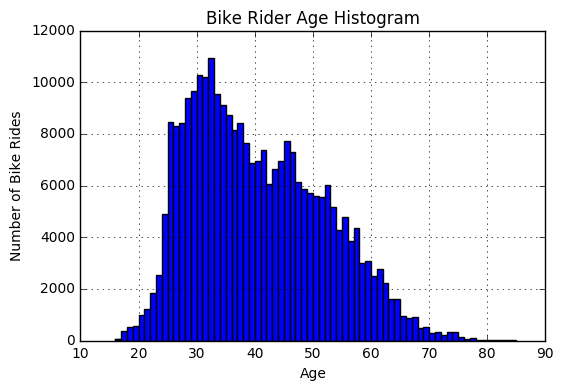

In [51]:
age_hist = df_small.hist(column = 'age', bins=69)
age_hist[0][0].set_xlabel('Age')
age_hist[0][0].set_ylabel('Number of Bike Rides')
age_hist[0][0].set_title('Bike Rider Age Histogram')

## Figure 2: Old vs. Non-Old Trip Duration Histogram

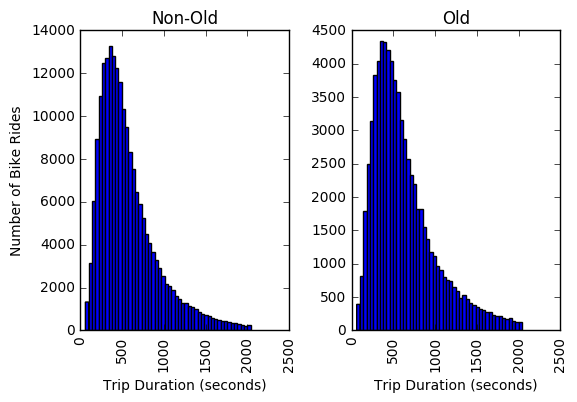

In [69]:
df_small['dur'] = df_small['tripduration']

tripdur_hist = df_small.hist(column = 'dur', by = 'old', bins=50)
tripdur_hist[0].set_xlabel('Trip Duration (seconds)')
tripdur_hist[0].set_ylabel('Number of Bike Rides')
tripdur_hist[0].set_title('Non-Old')
tripdur_hist[1].set_xlabel('Trip Duration (seconds)')
tripdur_hist[1].set_title('Old')

In [52]:
df_small.head(10)

,tripduration,birth year,starttime,age,old,dur
0,1346,1960.0,1/1/2015 0:01,55.0,True,1346
1,363,1963.0,1/1/2015 0:02,52.0,True,363
2,346,1974.0,1/1/2015 0:04,41.0,False,346
3,182,1969.0,1/1/2015 0:04,46.0,False,182
4,969,1977.0,1/1/2015 0:05,38.0,False,969
5,496,1969.0,1/1/2015 0:07,46.0,False,496
6,152,1972.0,1/1/2015 0:07,43.0,False,152
7,1183,1985.0,1/1/2015 0:08,30.0,False,1183
8,846,1991.0,1/1/2015 0:09,24.0,False,846
9,576,1991.0,1/1/2015 0:10,24.0,False,576


In [65]:
df_old = df_small[df_small['old']==True]
df_young = df_small[df_small['old']==False]
print(df_old.std())
print(df_young.std())

tripduration    377.057957
birth year        5.866311
age               5.866311
old               0.000000
dur             377.057957
dtype: float64
tripduration    349.953710
birth year        7.026065
age               7.026065
old               0.000000
dur             349.953710
dtype: float64


In [64]:
#t-test to test null hypothesis
T = (df_old.tripduration.mean() - df_young.tripduration.mean()) \
/ np.sqrt((((df_old.tripduration.std()**2) / len(df_old)) + \
((df_young.tripduration.std()**2)/len(df_young))))
print(T)

35.5033478091
